In [126]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pingouin as pg

# solidity 
aspect ratio
vergence

In [ ]:
main_dir = "D:/Internship/NTU/nellie_output/nellie_output/toxins/"

#file_path_feature = main_dir + "ins1_" + 'FCCP' + ".ome-ch0-features_components.csv"
#file_path_feature = main_dir + "/" + im_frame + "_resized_" + im_concen + "_glu_1min_#1.ome-ch0-features_components.csv"
file_path_feature = main_dir + "time_ins_" +"FCCP" + ".ome-ch0-features_components.csv"
df = pd.read_csv(file_path_feature)
mini_df = df[['t', 'reassigned_label_raw', 'area_raw' , 'solidity_raw', 'aspect_ratio_mean', 'vergere_mean' ] ]
mini_df.head()


,t,reassigned_label_raw,area_raw,solidity_raw,aspect_ratio_mean,vergere_mean
0,0.0,1.0,0.190454,0.821918,4.017767,NaN
1,0.0,2.0,0.558666,0.695652,7.092501,NaN
2,0.0,3.0,0.149189,0.783333,1.317815,NaN
3,0.0,4.0,0.676113,0.583562,4.569835,NaN
4,0.0,5.0,2.015642,0.321031,7.130161,NaN


what to do ?
morphological parameter by time? 
count by value? 

In [128]:
print(np.min(mini_df["aspect_ratio_mean"]) , np.max(mini_df["aspect_ratio_mean"]))
mean_ar = np.mean(mini_df["aspect_ratio_mean"]) 
std_ar = np.std(mini_df["aspect_ratio_mean"])

mean_div = np.mean(mini_df["vergere_mean"]) 
std_div = np.std(mini_df["vergere_mean"])

upper_bound_ar = mean_ar + 3*std_ar
upper_bound_div = mean_div + 1*std_div
lower_bound_div = mean_div - 1*std_div

mask_ar = np.array(mini_df["aspect_ratio_mean"])
mask_div = np.array(mini_df["vergere_mean"])
 
ar = mini_df[mask_ar < upper_bound_ar]
div = mini_df[mask_div < upper_bound_div]
div = div[div['vergere_mean'] > lower_bound_div]

print(upper_bound_div,lower_bound_div,mean_div)


1.0 56.37005768508886
0.08199068183864812 -0.08253797365807398 -0.00027364590971292667


In [162]:
x = pg.normality(data = div, dv = 'vergere_mean', group = 'reassigned_label_raw')
indexes =  x.index
mask = []
for index in indexes:
    print(np.unique(mini_df[mini_df["reassigned_label_raw"] == index]['reassigned_label_raw']))


indexes

c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 6.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 45.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 60.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 72.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\

[1.]
[2.]
[3.]
[4.]
[5.]
[7.]
[8.]
[9.]
[10.]
[12.]
[13.]
[6.]
[14.]
[17.]
[18.]
[22.]
[19.]
[25.]
[29.]
[28.]
[0.]
[27.]
[30.]
[35.]
[33.]
[36.]
[37.]
[38.]
[40.]
[42.]
[34.]
[47.]
[46.]
[45.]
[48.]
[50.]
[53.]
[55.]
[56.]
[58.]
[60.]
[64.]
[65.]
[67.]
[68.]
[72.]
[71.]
[70.]
[76.]
[75.]
[83.]
[82.]
[87.]
[84.]
[86.]
[90.]
[88.]
[89.]
[95.]
[99.]
[98.]
[102.]
[105.]
[103.]
[109.]
[104.]
[108.]
[110.]
[115.]
[111.]
[112.]
[117.]
[123.]
[118.]
[119.]
[121.]
[122.]
[125.]
[124.]
[129.]
[126.]
[127.]
[134.]
[137.]
[136.]
[138.]
[139.]
[142.]
[141.]
[143.]
[144.]
[146.]
[148.]
[149.]
[151.]
[158.]
[160.]
[155.]
[152.]
[154.]
[153.]
[163.]
[157.]
[161.]
[167.]
[171.]
[169.]
[170.]
[176.]
[179.]
[180.]
[182.]
[183.]
[181.]
[178.]
[177.]
[185.]
[186.]
[187.]
[188.]
[194.]
[193.]
[190.]
[198.]
[200.]
[199.]
[205.]
[201.]
[204.]
[202.]
[206.]
[208.]
[211.]
[209.]
[212.]
[210.]
[214.]
[213.]
[215.]
[216.]
[217.]
[221.]
[219.]
[222.]
[220.]
[224.]
[223.]
[225.]
[228.]
[227.]
[233.]
[231.]
[236.]


Index([  1.0,   2.0,   3.0,   4.0,   5.0,   7.0,   8.0,   9.0,  10.0,  12.0,
       ...
       278.0, 350.0, 283.0, 226.0, 270.0,  31.0, 192.0,  23.0,  80.0, 159.0],
      dtype='float64', name='reassigned_label_raw', length=289)

(55844, 6)

# chart

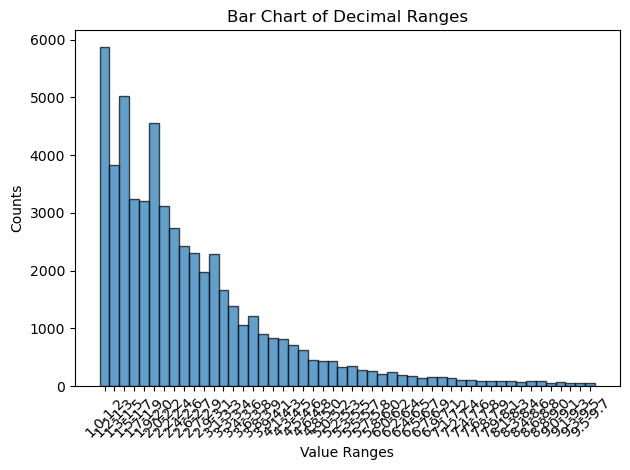

In [101]:
counts, bins = np.histogram(ar["aspect_ratio_mean"], bins=50)  # Create 10 bins for the range 0-1

# Bin centers (for bar positioning)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plotting
plt.bar(bin_centers, counts, width=(bins[1] - bins[0 ]), edgecolor='black', alpha=0.7)
plt.xlabel('Value Ranges')
plt.ylabel('Counts')
plt.title('Bar Chart of Decimal Ranges')
plt.xticks(bin_centers, labels=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], rotation=45)

plt.tight_layout()
plt.show()

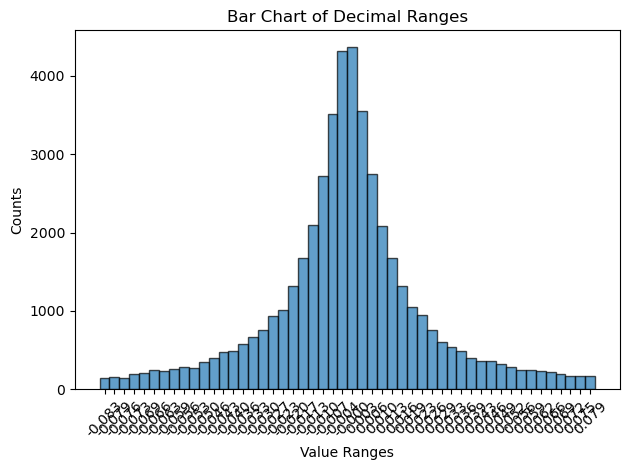

In [102]:
counts, bins = np.histogram(div["vergere_mean"], bins=50)  # Create 10 bins for the range 0-1

# + flow in 
#  - flow out

# Bin centers (for bar positioning)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plotting
plt.bar(bin_centers, counts, width=(bins[1] - bins[0 ]), edgecolor='black', alpha=0.7)
plt.xlabel('Value Ranges')
plt.ylabel('Counts')
plt.title('Bar Chart of Decimal Ranges')
plt.xticks(bin_centers, labels=[f'{bins[i]:.3f}' for i in range(len(bins)-1)], rotation=45)

plt.tight_layout()
plt.show()

# mdivi

In [103]:
main_dir = "D:/Internship/NTU/nellie_output/nellie_output/mdivi/"

file_path_feature = main_dir + "ins1_" + 'mdivi_3' + ".ome-ch0-features_components.csv"
#file_path_feature = main_dir + "/" + im_frame + "_resized_" + im_concen + "_glu_1min_#1.ome-ch0-features_components.csv"
#file_path_feature = main_dir + "time_ins_" +"FCCP" + ".ome-ch0-features_components.csv"
df = pd.read_csv(file_path_feature)
mini_df = df[['t', 'reassigned_label_raw', 'area_raw' , 'solidity_raw', 'aspect_ratio_mean', 'vergere_mean'] ]
mini_df.head()

,t,reassigned_label_raw,area_raw,solidity_raw,aspect_ratio_mean,vergere_mean
0,0.0,1.0,28.282472,0.606164,2.598591,NaN
1,0.0,2.0,0.022220,1.000000,1.044815,NaN
2,0.0,3.0,0.019045,1.000000,1.000000,NaN
3,0.0,4.0,12.014496,0.461698,2.515644,NaN
4,0.0,5.0,0.044439,1.000000,2.500000,NaN


In [104]:
print(np.min(mini_df["aspect_ratio_mean"]) , np.max(mini_df["aspect_ratio_mean"]))
mean_ar = np.mean(mini_df["aspect_ratio_mean"]) 
std_ar = np.std(mini_df["aspect_ratio_mean"])

mean_div = np.mean(mini_df["vergere_mean"]) 
std_div = np.std(mini_df["vergere_mean"])

upper_bound_ar = mean_ar + 3*std_ar
upper_bound_div = mean_div + 1*std_div
lower_bound_div = mean_div - 1*std_div

mask_ar = np.array(mini_df["aspect_ratio_mean"])
mask_div = np.array(mini_df["vergere_mean"])
 
ar = mini_df[mask_ar < upper_bound_ar]
div = mini_df[mask_div < upper_bound_div]
div = div[div['vergere_mean'] > lower_bound_div]

print(upper_bound_div,lower_bound_div,mean_div)
y = pg.normality(data = div, dv = 'vergere_mean', group = 'reassigned_label_raw')
y = x[x['normal'] == True]
y

1.0 60.76345596729068
0.08932099050126499 -0.08943781620705737 -5.8412852896187265e-05


c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 11.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 17.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 27.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 26.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin

,W,pval,normal
reassigned_label_raw,,,
1.0,0.981923,0.057655,True
3.0,0.969436,0.069803,True
9.0,0.989905,0.229945,True
12.0,0.961832,0.790433,True
13.0,0.850398,0.096156,True
...,...,...,...
235.0,0.988820,0.666702,True
283.0,0.833777,0.064974,True
226.0,0.974555,0.597310,True


# chart

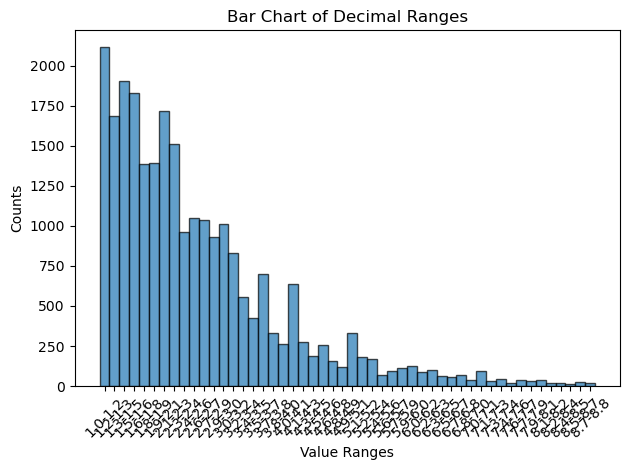

In [105]:
counts, bins = np.histogram(ar["aspect_ratio_mean"], bins=50)  # Create 10 bins for the range 0-1

# Bin centers (for bar positioning)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plotting
plt.bar(bin_centers, counts, width=(bins[1] - bins[0 ]), edgecolor='black', alpha=0.7)
plt.xlabel('Value Ranges')
plt.ylabel('Counts')
plt.title('Bar Chart of Decimal Ranges')
plt.xticks(bin_centers, labels=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], rotation=45)

plt.tight_layout()
plt.show()

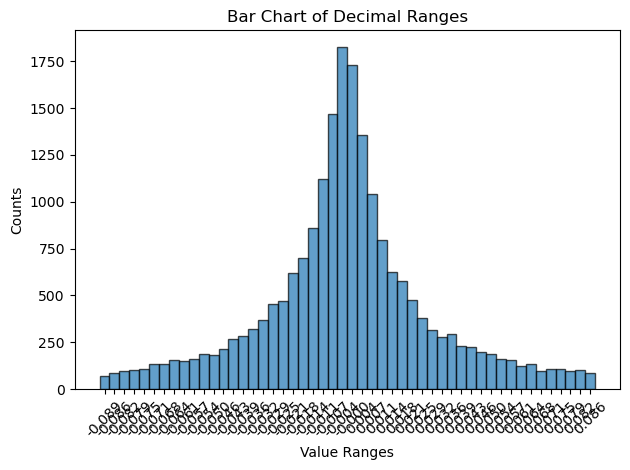

In [106]:
counts, bins = np.histogram(div["vergere_mean"], bins=50)  # Create 10 bins for the range 0-1

# + flow in 
#  - flow out

# Bin centers (for bar positioning)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plotting
plt.bar(bin_centers, counts, width=(bins[1] - bins[0 ]), edgecolor='black', alpha=0.7)
plt.xlabel('Value Ranges')
plt.ylabel('Counts')
plt.title('Bar Chart of Decimal Ranges')
plt.xticks(bin_centers, labels=[f'{bins[i]:.3f}' for i in range(len(bins)-1)], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:


# check number of label over time/frame 
# check area over time/frame
#stream_frame = ['1','1','1','1','5','5','10','10']
#stream_con = ['0','0.5','1','2','1','0.5','0','2']
stream_file = ['control','FCCP','oligomycin','Rotenone']
#stream_file = ['control_3','control_10min','mdivi_20uM_3','mdivi_20uM_3_10min']
main_dir = "D:/Internship/NTU/nellie_output/nellie_output/mdivi"

for s in range(len(stream_file)):
    # 1st part check area and number of label
    #im_concen = stream_con[s]
    im_concen = stream_file[s]
     
    #print(im_concen+"_"+im_frame)

    output_name = im_concen  + "_"  + "area_label_check"

    file_path_feature = main_dir + "ins1_" + im_concen + ".ome-ch0-features_components.csv"
    #file_path_feature = main_dir + "/" + im_frame + "_resized_" + im_concen + "_glu_1min_#1.ome-ch0-features_components.csv"
    #file_path_feature = main_dir + "time_ins_" + im_concen + ".ome-ch0-features_components.csv"
    df = pd.read_csv(file_path_feature)
    mini_df = df[['t', 'area_raw' , 'solidity_raw', 'aspect_ratio_mean', 'divergence_mean' , 'convergence_mean'] ]

    frames = np.unique(mini_df['t'])
    label_num_all = []
    area_all = []
    raw_label_all = []
    for frame in frames:
        mini_df_frame = mini_df[mini_df['t'] == frame]
        label_num = len(np.unique(mini_df_frame['reassigned_label_raw']))
        area = np.sum(mini_df_frame['area_raw'])
        raw_label = len(np.unique(mini_df_frame['label']))

        label_num_all.append(label_num)
        area_all.append(area)
        raw_label_all.append(raw_label) 
    
    label_NN_all = pd.DataFrame({ 'label_num': label_num_all, 'area': area_all, 'raw_label': raw_label_all})


# fission/fusion over time/frame